In [1]:
import numpy as np
from abc import ABC, abstractmethod



class Model(ABC):
    
    def score(self, y_test, predictions):
        return np.mean(y_test == predictions)
            

class NBC(Model):
    def __init__(self, feature_types:list, num_classes:int):
        self.feature_types = feature_types
        self.num_classes = num_classes
        self.classes = []
        self.__mean = self.__var = np.zeros((self.num_classes, len(self.feature_types)), dtype=np.float64)
        self.__priors = np.zeros(self.num_classes, dtype=np.float64)
        
    def fit(self, Xtrain, Ytrain):
        num_samples, _ = Xtrain.shape
        self.classes = np.unique(Ytrain)
        for i, classificate in enumerate(self.classes):
            X_classified = Xtrain[Ytrain == classificate]
            self.__mean[i, :] = X_classified.mean(axis=0)
            self.__var = X_classified.var(axis=0)
            self.__priors[i] = X_classified.shape[0] / float(num_samples)
    
    def predict(self, Xtrain):
        
        predictions = []
        
        for x in Xtrain:
        
            posterior_prob: list = []

            for i, classificate in enumerate(self.classes):
                prior = np.log(self.__priors[i])

                mean = self.__mean[i]
                var = self.__var[i]
                numerator = np.exp(- (x-mean)**2 / (2*var))
                denominator = np.sqrt(2*np.pi*var)

                posterior = np.sum(np.log(numerator/denominator))
                posterior += prior
                posterior_prob.append(posterior)
                
        
            predictions.append(self.classes[np.argmax(posterior_prob)])
        return np.array(predictions)

In [2]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def train_test_split(X, y):
    N, D = X.shape
    Ntrain = int(0.8 * N)
    shuffler = np.random.permutation(N)
    Xtrain = X[shuffler[:Ntrain]]
    ytrain = y[shuffler[:Ntrain]]
    Xtest = X[shuffler[Ntrain:]]
    ytest = y[shuffler[Ntrain:]]
    
    return Xtrain, Xtest, ytrain, ytest


def main():
    iris = load_iris()
    X, y = iris['data'], iris['target']
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
    nbc = NBC(feature_types=['r','r','r','r'], num_classes=3)
    nbc.fit(Xtrain, ytrain)
    predictions = nbc.predict(Xtest)
    print("NBC accuracy on Testing:", nbc.score(ytest,predictions))
    cm = confusion_matrix(ytest, predictions, labels=nbc.classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=nbc.classes)
    disp.plot()
    plt.show()

NBC accuracy on Testing: 0.9666666666666667


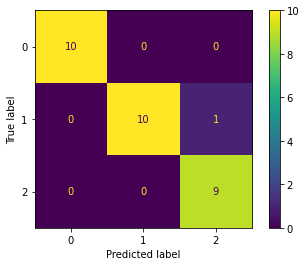

In [3]:
if __name__ == "__main__":
    main()